## Рубежный контроль №2
#### Арзамасцев Артем, ИУ5-62Б
#### Вариант 2

#### Задание.
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

##### Метод 1: `Метод опорных векторов`
##### Метод 2: `Случайный лес`
##### Набор данных
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##### Загрузка данных

In [2]:
from sklearn.datasets import load_wine


data_wine = load_wine()
data = pd.DataFrame(data=np.c_[data_wine['data'], data_wine['target']],
                    columns=list(data_wine['feature_names']) + ['target'])

In [3]:
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,0.0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1.0
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0.0


In [4]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Проверяем данные на пропуски
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Видно что пропуски в данных отсутствуют и категориальных признаков нет, значит, можно допольнительной предобработки данных не производить.

По характеру данных можно понять, что перед нами стоит задача классификации.

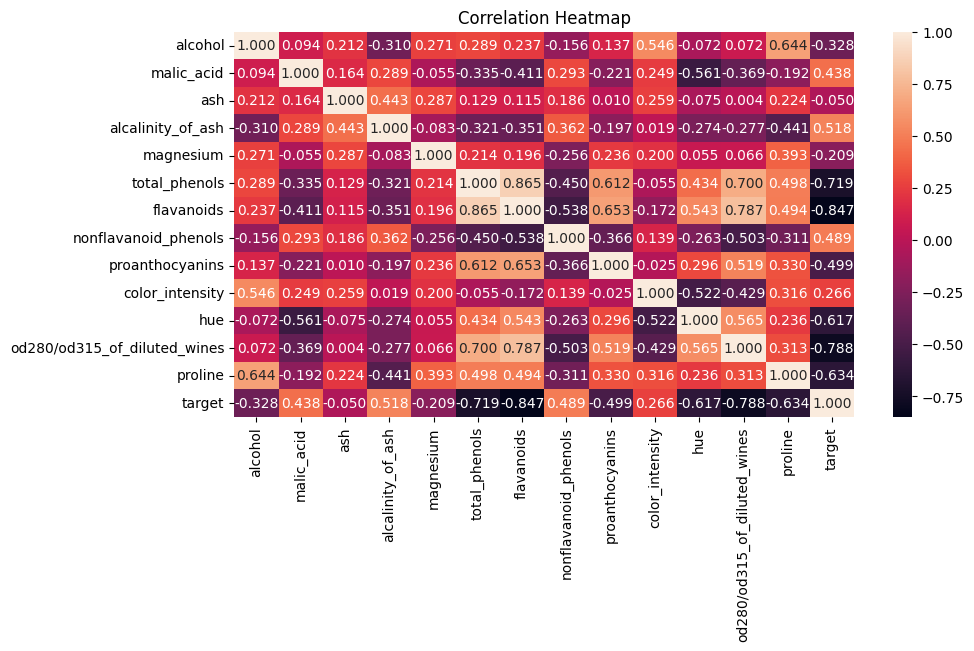

In [7]:
# Построение тепловой карты корреляции
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Разделение данных на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Обучение моделей

#### Метод опорных векторов (SVM)

In [9]:
# Обучение модели SVM
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_svm = svm_model.predict(X_test)

#### Случайный лес (Random Forest)

In [10]:
# Обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_rf = rf_model.predict(X_test)

### Выбор метрик

- **Accuracy**: Доля правильно предсказанных классов ко всем предсказаниям.
- **Precision**: Доля верно предсказанных положительных классов среди всех предсказанных положительных классов.
- **Recall**: Доля верно предсказанных положительных классов среди всех истинных положительных классов.
- **F1-score**: Гармоническое среднее между Precision и Recall.

##### Данный выбор метрик обоснован, следующими важными особенностями каждой метрики:

**Accuracy**: Общая точность модели, которая показывает, насколько хорошо модель справляется с классификацией в целом.\
**Precision**: Важна, когда необходимо минимизировать количество ложных положительных предсказаний.\
**Recall**: Важна, когда необходимо минимизировать количество ложных отрицательных предсказаний.\
**F1-score**: Комбинирует Precision и Recall, особенно полезен, когда классы несбалансированы.

### Сравнение моделей по метрикам

In [11]:
# Функция для вычисления метрик
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Вычисление метрик для модели SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)

# Вычисление метрик для модели случайного леса
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)

# Вывод результатов
print(f"SVM: Accuracy={accuracy_svm:.2f}, Precision={precision_svm:.2f}, Recall={recall_svm:.2f}, F1-score={f1_svm:.2f}")
print(f"Random Forest: Accuracy={accuracy_rf:.2f}, Precision={precision_rf:.2f}, Recall={recall_rf:.2f}, F1-score={f1_rf:.2f}")

SVM: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-score=0.97
Random Forest: Accuracy=1.00, Precision=1.00, Recall=1.00, F1-score=1.00


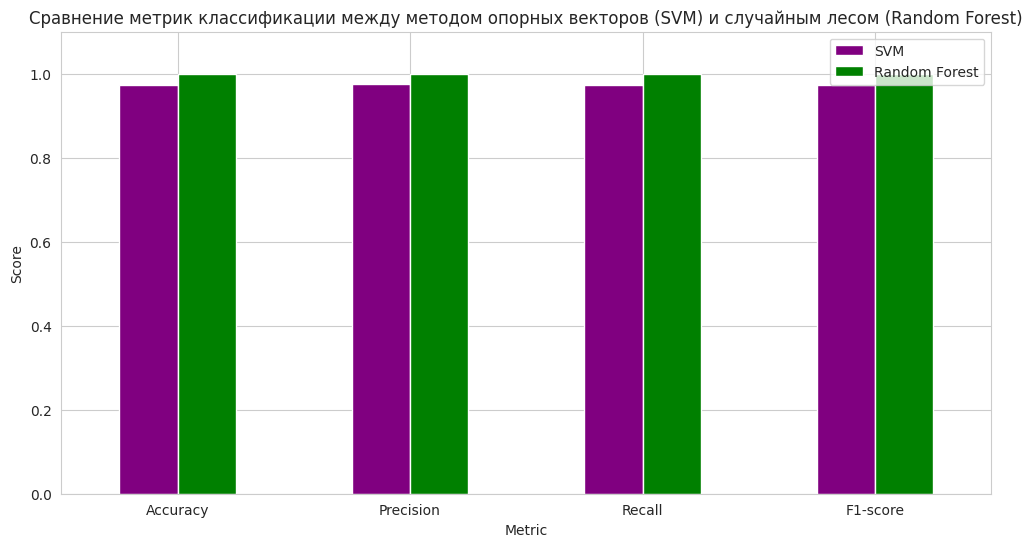

In [16]:
# Результаты метрик для обеих моделей
metrics = {
    'SVM': {
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1-score': f1_svm
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-score': f1_rf
    }
}

# Подготовка данных для графика
metric_names = list(metrics['SVM'].keys())
svm_scores = list(metrics['SVM'].values())
rf_scores = list(metrics['Random Forest'].values())

data_for_plot = pd.DataFrame({
    'Metric': metric_names,
    'SVM': svm_scores,
    'Random Forest': rf_scores
})

# Построение графика
sns.set_style("whitegrid")
data_for_plot.plot(kind='bar', x='Metric', figsize=(12, 6), color=['purple', 'green'])

# Настройка графика
plt.title('Сравнение метрик классификации между методом опорных векторов (SVM) и случайным лесом (Random Forest)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Немного увеличиваем верхнюю границу

# Отображение графика
plt.legend(loc='best')
plt.show()

### Оценка качества моделей на основе выбранных метрик

Результаты показывают, что обе модели, метод опорных векторов (SVM) и случайный лес (Random Forest), справляются с задачей классификации очень хорошо. 

1. Метод опорных векторов:\
Результаты показывают, что SVM модель классифицирует с высокой точностью. Она хорошо балансирует между precision и recall, что отражается в высоком значении F1-score. Это говорит о том, что модель делает мало ошибок и правильно предсказывает как положительные, так и отрицательные классы.

2. Случайный лес:\
Результаты показывают, что модель случайного леса достигла идеальных показателей по всем метрикам. Это означает, что модель абсолютно точно предсказывает все классы без ошибок.

Модель случайного леса достигла идеальных показателей по всем метрикам, но идеальные метрики у этого метода вызывают подозрения на переобучение

#### Проверка на Переобучение

##### Кросс-валидация

In [19]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация для SVM
svm_scores = cross_val_score(svm_model, X, y, cv=5)
print(f"SVM Cross-Validation Accuracy: {svm_scores.mean():.2f} ± {svm_scores.std():.2f}")

# Кросс-валидация для Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}")

SVM Cross-Validation Accuracy: 0.96 ± 0.04
Random Forest Cross-Validation Accuracy: 0.98 ± 0.03


In [20]:
# Анализ важности признаков
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                         Feature  Importance
6                     flavanoids    0.174022
12                       proline    0.163701
0                        alcohol    0.154448
9                color_intensity    0.144652
11  od280/od315_of_diluted_wines    0.106292
10                           hue    0.075012
5                  total_phenols    0.059979
3              alcalinity_of_ash    0.036170
4                      magnesium    0.021556
1                     malic_acid    0.019606
8                proanthocyanins    0.019334
2                            ash    0.012669
7           nonflavanoid_phenols    0.012559


##### Воспользуемся дополнительной метрикой для более глубоко анализа
**ROC AUC**: Позволяет оценить способность модели различать классы.

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Обучение моделей
svm_model = SVC(kernel='linear', probability=True, random_state=1)
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Получение вероятностей
y_prob_svm = svm_model.predict_proba(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

# Бинаризация целевой переменной для многоклассового ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Расчет ROC AUC для многоклассовой классификации
roc_auc_svm = roc_auc_score(y_test_bin, y_prob_svm, multi_class='ovr')
roc_auc_rf = roc_auc_score(y_test_bin, y_prob_rf, multi_class='ovr')

print(f"SVM ROC AUC: {roc_auc_svm:.2f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

SVM ROC AUC: 1.00
Random Forest ROC AUC: 1.00


Эти результаты подтверждают высокую производительность обеих моделей и указывают на то, что случайный лес немного превосходит SVM по точности.